In [1]:

import sys
sys.path.append('..')

from dataset import ModisDataset
import pandas as pd
import geopandas as gpd
#!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt
import os
import torch
from model import Model, restore
import numpy as np
from visualizations import make_and_plot_predictions, make_and_plot_combined_predictions

tumblack = "#000000"
tumblue = "#0065bd"
tumorange = "#e37222"
tumbluelight = "#64a0c8"
tumgray = "#999999"
tumlightgray = "#dad7cb"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

num_layers = 3
hidden_size = 32
region = "germany"
epoch = 10
model_name = f"LSTM_{region}_l={num_layers}_h={hidden_size}_e={epoch}.pth"
model_dir="/tmp/models/"


model_path=os.path.join(model_dir,model_name)
device = torch.device('cuda')

dataset = ModisDataset(region=region,
                            fold="test",
                            znormalize=True,
                            augment=False,
                            include_time=False,
                            smooth=None)

local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
x,y = dataset[0]


array([[-0.40269898],
       [-0.24157825],
       [-0.63868831],
       [-0.20874115],
       [-0.20917898],
       [ 1.02374487],
       [ 1.17129293],
       [ 1.11131048],
       [ 1.26411248],
       [ 1.10955917],
       [ 1.20807049],
       [ 0.94537364],
       [ 1.04738758],
       [ 0.93004966],
       [ 0.9182283 ],
       [ 0.58022503],
       [ 0.49791336],
       [ 0.28512891],
       [ 0.06709053],
       [ 0.04607479],
       [-2.06513217],
       [-1.66495731],
       [ 0.12838646],
       [-1.77966826],
       [ 0.19931461],
       [-0.26040486],
       [-1.3527859 ],
       [ 0.15202918],
       [ 0.582852  ],
       [ 1.1458989 ],
       [ 1.21814053],
       [ 1.12444532],
       [ 1.32409492],
       [ 1.23039972],
       [ 1.06183591],
       [ 1.07628424],
       [ 0.94406016],
       [ 0.51542648],
       [ 0.59292205],
       [ 0.53337743],
       [-2.14394122],
       [-1.76346863],
       [-1.46092943],
       [-1.54980853],
       [-0.01959942],
       [ 0

In [8]:
series = dataset.data[17].astype(float)


ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None

In [14]:
import pandas as pd

In [76]:
idx = 17
x = dataset.data[idx]
date = dataset.date[idx]

series = pd.Series(x[:,0],index=date.astype("datetime64[D]")).resample('7D').interpolate().dropna()

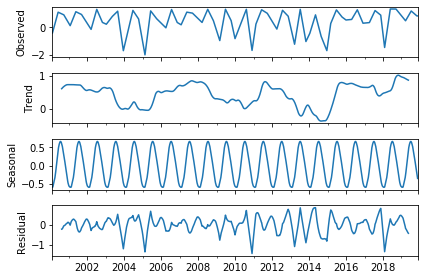

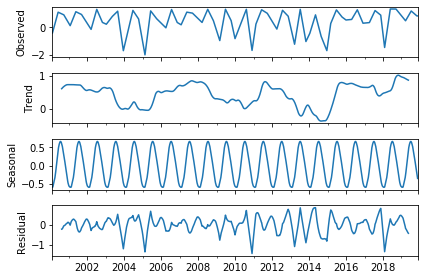

In [77]:
result = seasonal_decompose(series, model='additive')
result.plot()

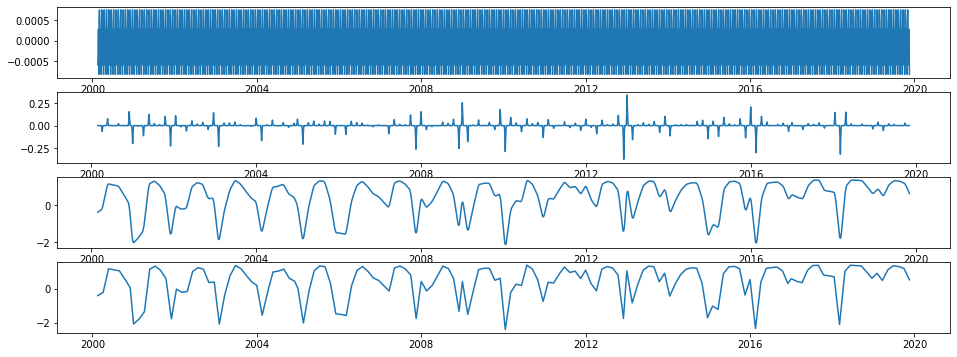

In [61]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4,1, figsize=(16,6))
ax = axs[0]
axs[0].plot(result.seasonal)
axs[1].plot(result.resid)
axs[2].plot(result.trend)

axs[3].plot(result.observed)